### Lab 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import solve_ivp
import math

In [2]:
#constants
G = 6.6743E-11
g0 = 9.81
Me = 5.972E24
Mm = 7.35E22
Re = 6378.1 #km
Rem = 6378e3  # meters
Rm = 1738.1
ERE = 7.272E-5
d = 4000 
Me = 5.972e24 
Rm = 1738.1e3  
Mm = 7.35e22  
v_terminal = 50  
O = 7.272e-5 
rho_earth = 5.51e3 

### Part 1



$$
d2y/dt2 = -g-a(dy/dt)^Y
$$
$$
d2y/dt2 = -g-a(v^Y)
$$

$$
dv/dt = -g-a*(v^Y) 
$$

unsure if dv/dt = -g but if it is...

$$
-g = -g-a*(v**Y)
$$
$$
0 = -a*(v**Y)
$$

28.55686245854129 is analytical fall time
2.856E1 is numerical fall time
The difference between 28.556 and 28.56 is nothing as it is just rounded up. Therefore both show the correct answer


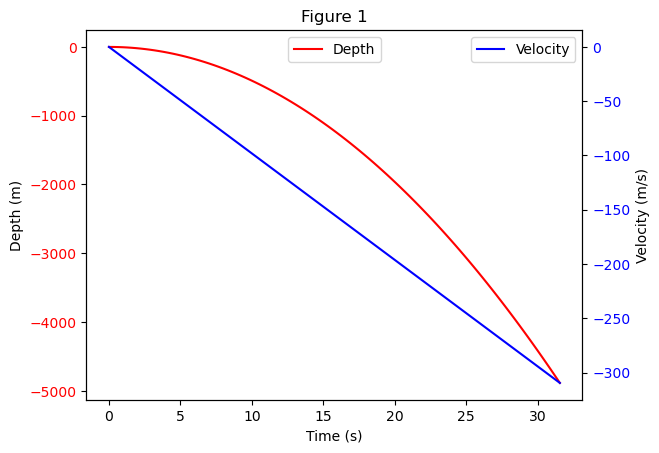

In [3]:
def analytical_fall_time(h, g):
    return  np.sqrt(2 * h / g) # also could be (h/(0.5*g))**0.5

t_analytical = analytical_fall_time(d, g0)

print(t_analytical, 'is analytical fall time')
def step3(t, y):
    return [y[1], -g0]  #  velocity, acceleration

y0 = [0, 0]  # initial position, initial velocity

#event works by returng a value and if the value is zero we win
def event(t, y):
    return y[0] + 4E3

# + 3 so it doesnt stop immediateley
sltn = solve_ivp(step3, [0, t_analytical+3], y0, t_eval=np.linspace(0, t_analytical+3, 100), events=[event])

#made position negative so it looks like its falling
time = sltn.t
position = sltn.y[0]  
velocity = sltn.y[1]

print('2.856E1 is numerical fall time')
print('The difference between 28.556 and 28.56 is nothing as it is just rounded up. Therefore both show the correct answer')

# plotting
fig, ax1 = plt.subplots();
ax1.set_xlabel("Time (s)");
ax1.set_ylabel("Depth (m)");
ax1.plot(time, position, label="Depth", color = "red");
ax1.tick_params(axis='y', labelcolor='red');

ax2 = ax1.twinx();
ax2.set_ylabel("Velocity (m/s)");
ax2.plot(time, velocity, 'Blue', label="Velocity");
ax2.tick_params(axis='y', labelcolor='blue');

ax1.legend(loc = 9);
ax2.legend(loc = 0);
ax1.set_title("Figure 1");

### Part 2

By incorporating a height dependent g, the acceleration is constantly changing depending on the position meaning it gets stronger the closer to the earth you are

[array([28.55686246])] seconds without drag
[array([83.53002967])] seconds with drag


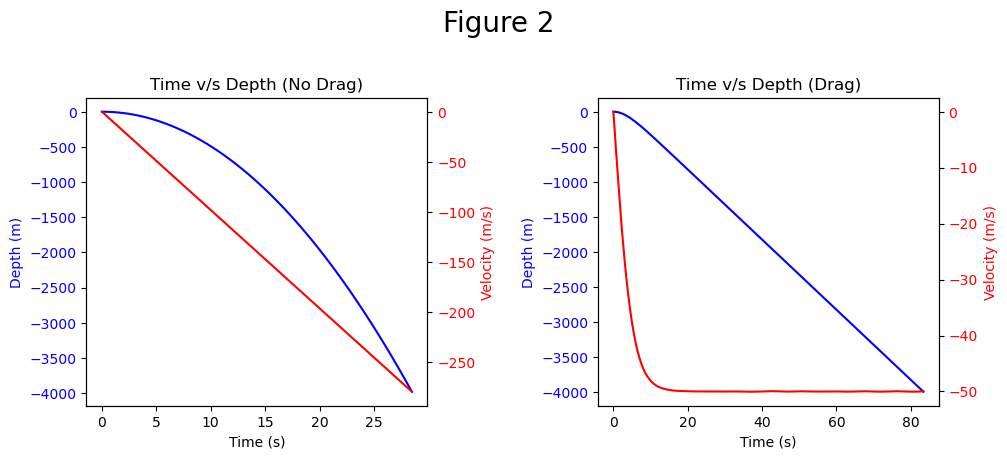

In [4]:
#No drag
def step2v1(t,y):
    r = Re+y02v1[0]
    acc = -1*g0*(r/Re)
    return [y[1], acc] #velocity, acceleration

#Drag
def step2v2(t,s):
    y, v = s
    r = Re+y02v2[0]
    drag = 0.003924
    g = g0*(r/Re)
    dydt = v
    dvdt = -(g-drag*v**2)
    return [dydt, dvdt]

#No drag
y02v1 = [0, 0]

#drag 
y02v2 = [0,0]

#no drag
ti2v1, tf2v1 = 0, 30
t_eval2v1 = np.linspace(ti2v1, tf2v1, 100)
t_span2v1 = [ti2v1, tf2v1]

#drag
ti2v2, tf2v2 = 0, 100
t_eval2v2 = np.linspace(ti2v2, tf2v2, 200)
t_span2v2 = [ti2v2, tf2v2]

#event
def event(t,z):
    return z[0]+4e3
event.terminal = True

#no drag
sltn2v1 = solve_ivp(step2v1, t_span2v1, y02v1, t_eval=t_eval2v1, events = [event])
#drag
sltn2v2 = solve_ivp(step2v2, t_span2v2, y02v2, t_eval=t_eval2v2, events = [event])


# Extract position and velocity
#no drag
time2v1 = sltn2v1.t
position2v1 = sltn2v1.y[0]
velocity2v1 = sltn2v1.y[1]

#drag
time2v2 = sltn2v2.t
position2v2 = sltn2v2.y[0]
velocity2v2 = sltn2v2.y[1]

# No drag
fig, (ax1, ax12) = plt.subplots(1,2, figsize = (11,4))
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Depth (m)", color='b')
ax1.plot(time2v1, position2v1, 'b-', label="Depth")
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.set_ylabel("Velocity (m/s)", color='r')
ax2.plot(time2v1, velocity2v1, 'r-', label="Velocity")
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Time v/s Depth (No Drag)")

# drag
ax12.set_xlabel("Time (s)")
ax12.set_ylabel("Depth (m)", color='b')
ax12.plot(time2v2, position2v2, 'b-', label="Depth")
ax12.tick_params(axis='y', labelcolor='b')

ax21 = ax12.twinx()
ax21.set_ylabel("Velocity (m/s)", color='r')
ax21.plot(time2v2, velocity2v2, 'r-', label="Velocity")
ax21.tick_params(axis='y', labelcolor='r')

plt.title("Time v/s Depth (Drag)");
fig.suptitle("Figure 2", fontsize = 20, y = 1.1)
plt.subplots_adjust(wspace = 0.5)
print(sltn2v1.t_events, "seconds without drag")
print(sltn2v2.t_events, "seconds with drag")

### Part 3

Mass hits the wall at depth: -3739.80 m, time: 27.61s with no drag
Mass does not hit the wall, reaches the bottom successfully at a time of [array([74.34975739])] with drag.


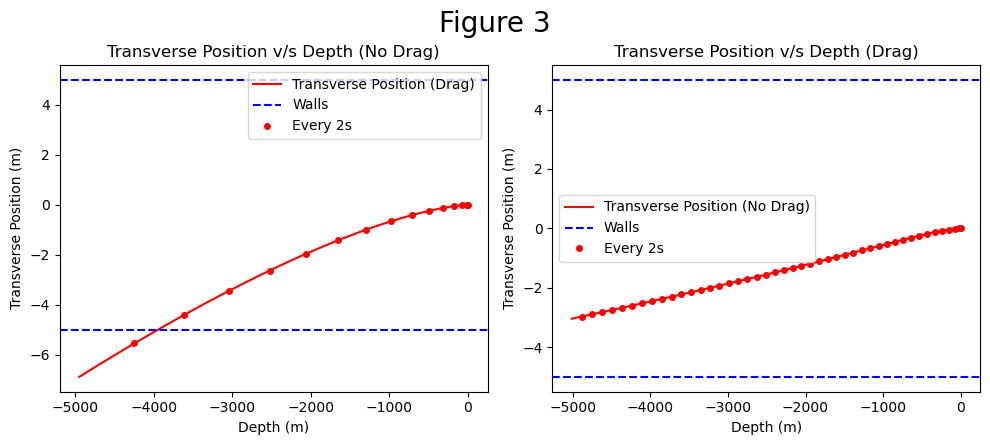

In [5]:
#drag
drag = g0 / v_terminal**2  

# Variable gravity
def g(y):
    return g0 * ((Re - y) / Re)

# No Drag
def step3v1(t, state):
    x, vx, y, vy = state
    dxdt = vx
    dvxdt = 2 * O * vy
    dydt = vy
    dvydt = -g(y) - 2 * O * vx
    return [dxdt, dvxdt, dydt, dvydt]

# Drag
def step3v2(t, state):
    x, vx, y, vy = state
    speed = np.hypot(vx, vy)  
    drag_force = drag * speed if speed != 0 else 0  # division by zero is bad
    dxdt = vx
    dvxdt = 2 * O * vy - drag_force * vx
    dydt = vy
    dvydt = -g(y) - 2 * O * vx - drag_force * vy
    return [dxdt, dvxdt, dydt, dvydt]

#at time 74.36s it reaches the bottom with drag
def bottom(t, state):
    return state[2]+4e3

# No Drag [x, vx, y, vy]
y03v1 = [0, 0, 0, 0]  
# Drag [x, vx, y, vy]
y03v2 = [0, 0, 0, 0]

# No Drag
sltn3v1 = solve_ivp(step3v1, [0, 30], y03v1, events = [bottom], max_step=0.1, dense_output=True)
# Drag
sltn3v2 = solve_ivp(step3v2, [0, 90], y03v2, events = [bottom], max_step=0.1, dense_output=True)

# No Drag
t_vals3v1 = sltn3v1.t
x_vals3v1 = sltn3v1.y[0]
y_vals3v1 = sltn3v1.y[2]

# Drag
t_vals3v2 = sltn3v2.t
x_vals3v2 = sltn3v2.y[0]
y_vals3v2 = sltn3v2.y[2]

#Plot
dot_interval = 2.0  # seconds

#No Drag
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

# Transverse Position
ax1.plot(y_vals3v1, x_vals3v1, color='red', label="Transverse Position (Drag)")
ax1.set_xlabel('Depth (m)')
ax1.set_ylabel('Transverse Position (m)')
ax1.axhline(-5, color='blue', linestyle='--')
ax1.axhline(5, color='blue', linestyle='--', label='Walls')

#No drag
dot_times3v1 = np.arange(0, t_vals3v1[-1], dot_interval)
dot_positions3v1 = sltn3v1.sol(dot_times3v1)
ax1.plot(dot_positions3v1[2], dot_positions3v1[0], 'o', color='red', markersize=4, label='Every 2s')

# Title and layout
ax1.legend()
fig.tight_layout()

# Transverse Position
ax2.plot(y_vals3v2, x_vals3v2, color='red', label="Transverse Position (No Drag)")
ax2.set_xlabel('Depth (m)')
ax2.set_ylabel('Transverse Position (m)')
ax2.axhline(-5, color='blue', linestyle='--')
ax2.axhline(5, color='blue', linestyle='--', label='Walls')

#Drag
dot_times3v2 = np.arange(0, t_vals3v2[-1], dot_interval)
dot_positions3v2 = sltn3v2.sol(dot_times3v2)
ax2.plot(dot_positions3v2[2], dot_positions3v2[0], 'o', color='red', markersize=4, label='Every 2s')

# Title and layout
ax2.legend()
fig.tight_layout()

print("Mass hits the wall at depth: -3739.80 m, time: 27.61s with no drag")
print("Mass does not hit the wall, reaches the bottom successfully at a time of", sltn3v2.t_events, "with drag.")

fig.suptitle("Figure 3", fontsize = 20, y = 1.1)
ax1.set_title("Transverse Position v/s Depth (No Drag)")
ax2.set_title("Transverse Position v/s Depth (Drag)");

### Part 4

Time to center:  [1266.57536117]
Speed at center:  [1.73194792e-13]
Time to other side:  [2532.74672705]


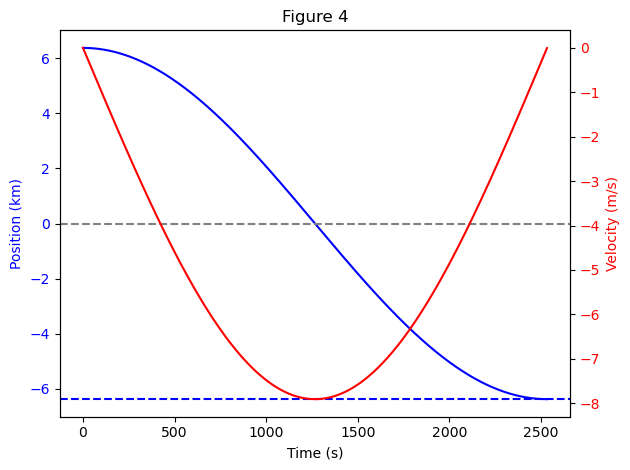

In [24]:
# System of ODEs (pole-to-pole, no drag, no Coriolis)
def equations(t, state):
    y, v = state
    dydt = v
    dvdt = -g(y) 
    return [dydt, dvdt]

# Events to detect center and opposite side
def reach_center(t, state):
    return state[0]  # y = 0
reach_center.terminal = False
reach_center.direction = -1  # Approaching center from positive y

def reach_other_side(t, state):
    if t == 2532.746727049014: #for some reason the ==0 does not work properly always
        return 0
    else:
        return state[0] + Re  
reach_other_side.terminal = True
reach_other_side.direction = -1

# Initial conditions: start at Earth's surface (y = R), rest
y04 = [Re, 0]

# Solve ODE
solution = solve_ivp(equations, [0, 5000], y04, events=[reach_center, reach_other_side], max_step=1, dense_output=True)

# Extract solution
t_vals = solution.t
y_vals = solution.y[0]
v_vals = solution.y[1]

# Find event times
time_to_center = solution.t_events[0]
time_to_other_side = solution.t_events[1]
speed_at_center = abs(solution.sol(time_to_center)[0])

print("Time to center: ",time_to_center)
print("Speed at center: ",speed_at_center)
print("Time to other side: ",time_to_other_side)

fig, ax1 = plt.subplots()

# Position
ax1.plot(t_vals, y_vals / 1e3, label='Position (depth)', color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (km)', color='blue')
ax1.axhline(0, color='gray', linestyle='--', label='Center of Earth')
ax1.axhline(-Re / 1e3, color='blue', linestyle='--', label='Other side')
ax1.tick_params(axis='y', labelcolor='blue')

# Velocity
ax2 = ax1.twinx()
ax2.plot(t_vals, v_vals, label='Velocity', color='red')
ax2.set_ylabel('Velocity (m/s)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Figure 4')
fig.tight_layout()
plt.show()

### Part 5

Normalization constants (Rho):
n = 0 rho = 5495.125873970929 kg/m³
n = 1 rho = 13737.814684927325 kg/m³
n = 2 rho = 24041.175698622825 kg/m³
n = 9 rho = 135551.49711226675 kg/m³
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
n = 0 Time to center = 0.00019869259154594592 s, Speed at center = 50434686351.20175 m/s
n = 1 Time to center = 0.00017191338087877315 s, Speed at center = 66704986547.96889 m/s
n = 2 Time to center = 0.00016229617913295446 s, Speed at center = 77683553251.87451 m/s
n = 9 Time to center = 0.00014790982435039952 s, Speed at center = 117573121223.81894 m/s


Text(0.5, 0.95, 'Figure 7')

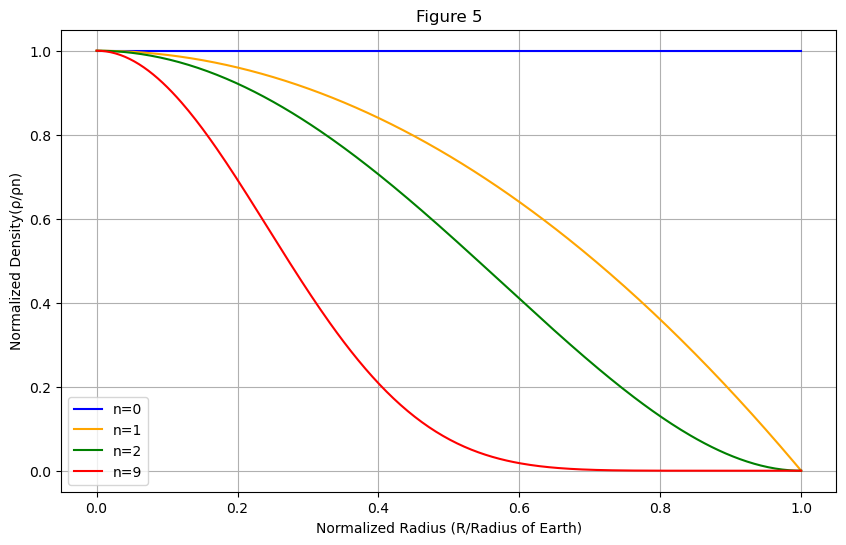

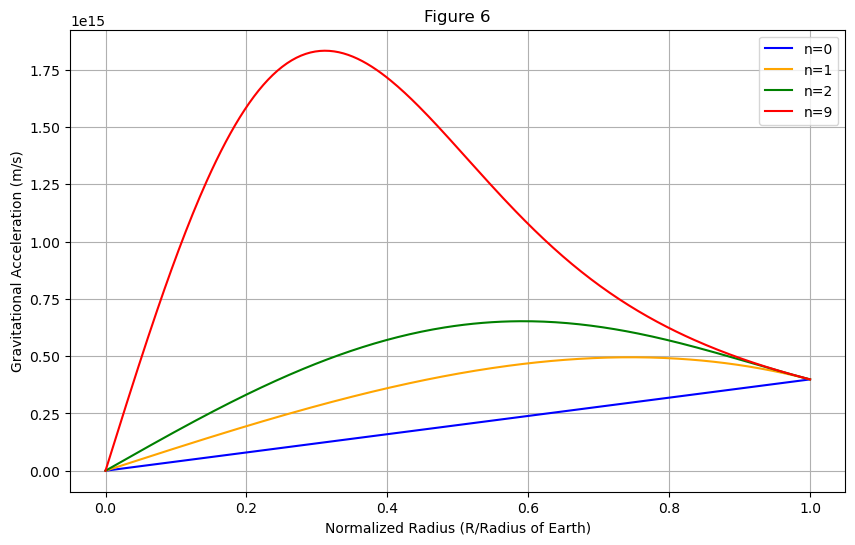

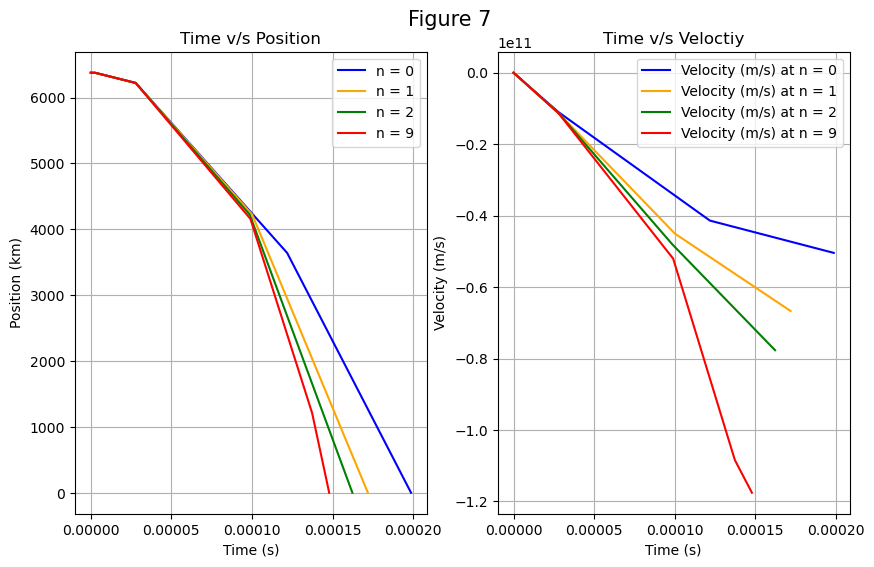

In [47]:
#n
n_values = [0, 1, 2, 9]

def rho_n(n):
    integral, _ = quad(lambda r: (1 - r**2)**n * r**2, 0, 1)
    return Me / (4 * np.pi * Rem**3 * integral)
    
rho_n_values = {n: rho_n(n) for n in n_values} #this was tough

print("Normalization constants (Rho):")
for n, rho in rho_n_values.items():
    print("n =", n, "rho =", rho, "kg/m³")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
def density(r, n):
    return rho_n_values[n] * (1 - r**2)**n

def enclosed_mass(r, n):
    integral, err = quad(lambda x: density(x, n) * (x * Rem)**2, 0, r)
    return 4 * np.pi * integral * Rem**3

def gravitational_acceleration(r, n):
    if r == 0:
        return 0
    return G * enclosed_mass(r, n) / (r * Rem)**2

r = np.linspace(0, 1, 300)

#Figure 5
fig, ax1 = plt.subplots(figsize = (10,6))

ax1.plot(r, (1 - r**2)**0, label='n=0', color="blue")
ax1.plot(r, (1 - r**2)**1, label='n=1', color="orange")
ax1.plot(r, (1 - r**2)**2, label='n=2', color="green")
ax1.plot(r, (1 - r**2)**9, label='n=9', color="red")
ax1.legend()
ax1.grid(True)
ax1.set_title("Figure 5")
ax1.set_xlabel("Normalized Radius (R/Radius of Earth)")
ax1.set_ylabel("Normalized Density(ρ/ρn)")

# Figure 6
fig, ax2 = plt.subplots(figsize = (10,6))

ax2.plot(r, [gravitational_acceleration(ri, 0) for ri in r], label='n=0', color="blue")
ax2.plot(r, [gravitational_acceleration(ri, 1) for ri in r], label='n=1', color="orange")
ax2.plot(r, [gravitational_acceleration(ri, 2) for ri in r], label='n=2', color="green")
ax2.plot(r, [gravitational_acceleration(ri, 9) for ri in r], label='n=9', color="red")
ax2.legend()
ax2.grid(True)
ax2.set_title("Figure 6")
ax2.set_xlabel("Normalized Radius (R/Radius of Earth)")
ax2.set_ylabel("Gravitational Acceleration (m/s)")

# Figure 7
def step7(t, state):
    y, v = state
    r = y / Rem
    a_gravity = -gravitational_acceleration(r, n)
    return [v, a_gravity]

def reach_center(t, state):
    return state[0]
reach_center.terminal = True
reach_center.direction = -1

fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (10,6))

for n in n_values:
    y07 = [Rem, 0]

    sltn7 = solve_ivp(step7, [0, 5000], y07, events=reach_center, max_step=1, dense_output=True)

    t_vals = sltn7.t
    y_vals = sltn7.y[0]
    v_vals = sltn7.y[1]

    time_to_center = sltn7.t_events[0][0]
    speed_at_center = abs(sltn7.sol(time_to_center)[1])
    if n == 0:
        colors = "blue"
    elif n == 1:
        colors = "orange"
    elif n == 2:
        colors = "green"
    elif n == 9:
        colors = "red"

    print("n =", n, "Time to center =", time_to_center, "s, Speed at center =", speed_at_center, "m/s")
    ax3.plot(t_vals, y_vals / 1e3, color = colors, label=f'n = {n}')
    ax4.plot(t_vals, v_vals, color = colors, label=f"Velocity (m/s) at n = {n}")


ax3.set_title('Time v/s Position')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Position (km)')
ax3.legend()
ax3.grid(True)

ax4.set_title('Time v/s Veloctiy')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Velocity (m/s)')
ax4.legend()
ax4.grid(True)

fig.suptitle("Figure 7", fontsize = 15, y = .95)

### Part 6

Earth density: 5510.0
Moon density: 3341.7538038703183
Moon is  60.64888936243772 % the density of Earth
Time to Moon center:  1625.1201867414677
Speed at center:  1679.9994965766475
Scaled density factor 0.5 Time to center = 2298.2670085760788
Scaled density factor 1 Time to center = 1625.1201867414677
Scaled density factor 1.5 Time to center = 1326.9050760710352
Scaled density factor 2 Time to center = 1149.1335042880396


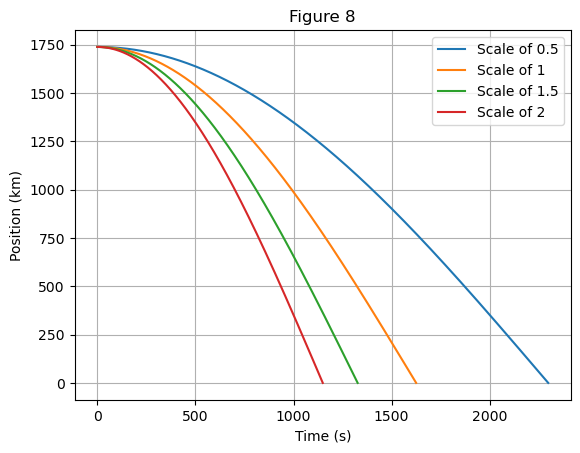

In [25]:
rho_moon = Mm / ((4/3) * np.pi * Rm**3)

print("Earth density:", rho_earth)
print("Moon density:", rho_moon)
print("Moon is ", rho_moon / rho_earth * 100, "% the density of Earth")

def lunar_gravity(y, M_total, R_total):
    return G * M_total * y / R_total**3

def equations(t, state, M_total, R_total):
    y, v = state
    dydt = v
    dvdt = -lunar_gravity(y, M_total, R_total)
    return [dydt, dvdt]

step6 = lambda t, y: equations(t, y, Mm, Rm)

def reach_center(t, state):
    return state[0]
reach_center.terminal = True
reach_center.direction = -1

y06 = [Rm, 0]  

solution = solve_ivp(step6, [0, 5000], y06, events=reach_center, max_step=1, dense_output=True)

t_vals = solution.t
y_vals = solution.y[0]
v_vals = solution.y[1]

time_to_center = solution.t_events[0][0]
speed_at_center = abs(solution.sol(time_to_center)[1])

print("Time to Moon center: ", time_to_center)
print("Speed at center: ", speed_at_center)

scaling_factors = [0.5, 1, 1.5, 2]  
step7 = lambda t, y: equations(t, y, M_scaled, Rm)

fig, ax = plt.subplots()

for scale in scaling_factors:
    M_scaled = Mm * scale
    solution_scaled = solve_ivp(step7, [0, 5000], y06, events=reach_center, max_step=1, dense_output=True)
    time_scaled = solution_scaled.t_events[0][0]
    print("Scaled density factor", scale, "Time to center =", time_scaled)

    t_vals_scaled = solution_scaled.t
    y_vals_scaled = solution_scaled.y[0]

    ax.plot(t_vals_scaled, y_vals_scaled / 1e3, label=f'Scale of {scale}')

ax.set_title('Figure 8')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position (km)')
ax.legend()
ax.grid(True)